In [5]:
import pandas as pd
from matplotlib import style
style.use('dark_background')
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [6]:
def numeric_converter(df):
    # initializing categorical column as a set as it might be repeated in the below two steps
    cat_cols = set()
    label_dict = {}
    numeric_dtypes = [
        "int8",
        "int16",
        "int32",
        "int64",
        "float16",
        "float32",
        "float64",
    ]
    cat_cols = cat_cols.union(df.select_dtypes(exclude=numeric_dtypes).columns)
    for cat_col in cat_cols:
        # converting them to numeric and storing their mapping
        classes = pd.Categorical(df[cat_col])
        df[cat_col] = classes.codes
        label_dict[cat_col] = classes.categories

    # selecting only numeric types
    df = df.select_dtypes(numeric_dtypes)

    return df, label_dict
data = pd.read_csv('../data/diabetes_prediction_dataset.csv')
data, mapping = numeric_converter(data)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [7]:
features = data.drop(['diabetes'], axis=1)
target = data[['diabetes']]

<AxesSubplot: >

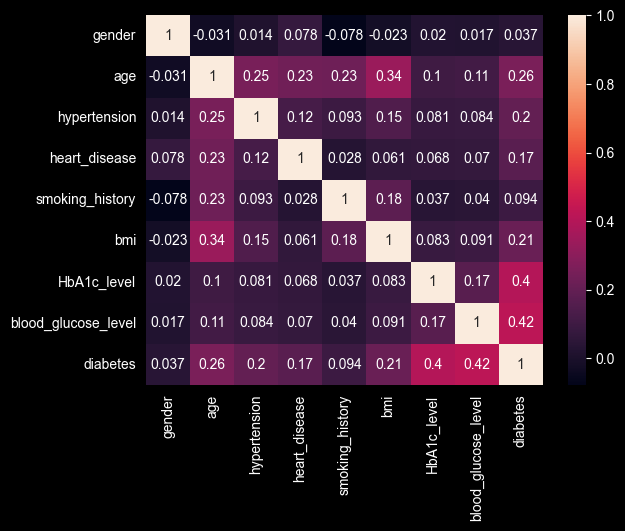

In [8]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True)

In [9]:
over_sampler = SMOTE()
features, target = over_sampler.fit_resample(features, target)
print(features.shape)

(183000, 8)


In [10]:
resampled_data = pd.concat([features, target], axis=1)
resampled_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.000000,0,1,4,25.190000,6.600000,140,0
1,0,54.000000,0,0,0,27.320000,6.600000,80,0
2,1,28.000000,0,0,4,27.320000,5.700000,158,0
3,0,36.000000,0,0,1,23.450000,5.000000,155,0
4,1,76.000000,1,1,1,20.140000,4.800000,155,0
...,...,...,...,...,...,...,...,...,...
182995,1,51.077938,0,0,4,38.981559,8.807794,159,1
182996,0,80.000000,0,0,2,27.320000,8.455736,159,1
182997,0,72.009785,1,0,4,30.345969,6.800000,200,1
182998,0,66.000000,0,0,3,42.517818,7.635214,300,1


<AxesSubplot: >

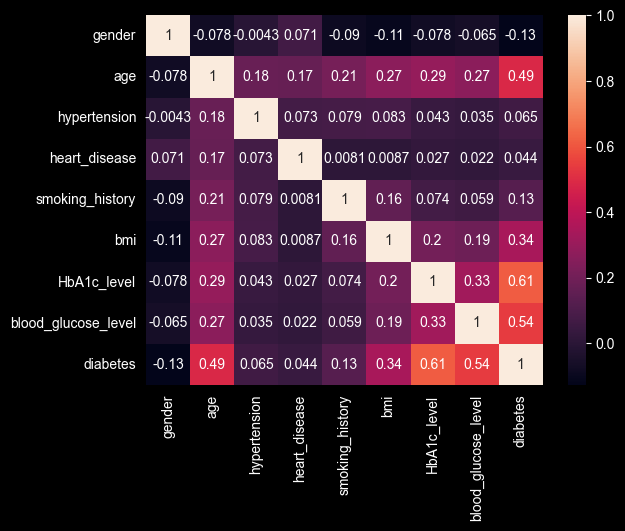

In [11]:
sns.heatmap(resampled_data.corr(), annot=True)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target,test_size=.2)
x_train.shape

(146400, 8)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


model = keras.Sequential([
    layers.Dense(64,'relu'),
    layers.Dropout(.8),
    layers.Dense(32,'relu'),
    layers.Dropout(.8),
    layers.Dense(16,'relu'),
    layers.Dropout(.5),
    layers.Dense(1, 'sigmoid'),
])
model.compile('adam','binary_crossentropy',['accuracy'])

In [14]:
history = model.fit(x_train, y_train,batch_size=512,epochs=100, validation_split=.2)

Epoch 1/100
229/229 [==============================] - 2s 4ms/step - loss: 10.1921 - accuracy: 0.5006 - val_loss: 0.6936 - val_accuracy: 0.4987
Epoch 2/100
229/229 [==============================] - 1s 4ms/step - loss: 1.1478 - accuracy: 0.5036 - val_loss: 0.6933 - val_accuracy: 0.4987
Epoch 3/100
229/229 [==============================] - 1s 3ms/step - loss: 0.8322 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4987
Epoch 4/100
229/229 [==============================] - 1s 3ms/step - loss: 0.7498 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 5/100
229/229 [==============================] - 1s 4ms/step - loss: 0.7234 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 6/100
229/229 [==============================] - 1s 3ms/step - loss: 0.7119 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 7/100
229/229 [==============================] - 1s 3ms/step - loss: 0.7047 - accuracy: 0.5018 - val_loss: 0.6931 - val_accuracy: 0.501

In [15]:
hist = pd.DataFrame(history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,10.192077,0.500623,0.693601,0.498702
1,1.147778,0.503560,0.693259,0.498702
2,0.832246,0.501494,0.693154,0.498702
3,0.749801,0.500692,0.693144,0.501298
4,0.723447,0.500717,0.693148,0.501298
...,...,...,...,...
95,0.506573,0.730362,0.290868,0.876844
96,0.503570,0.734588,0.329719,0.880464
97,0.504256,0.732454,0.285961,0.890847
98,0.495015,0.740608,0.286830,0.887056


<AxesSubplot: >

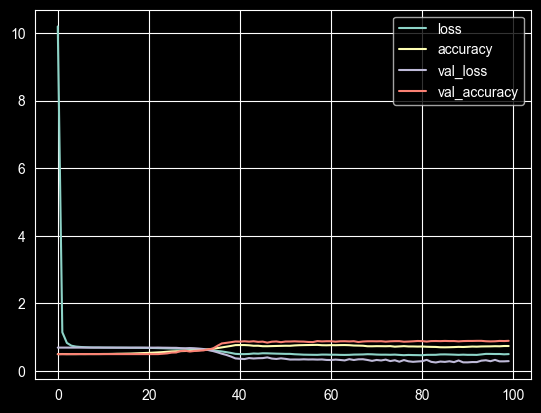

In [16]:
hist.plot()

In [17]:
preds = model.predict(data.drop('diabetes',axis=1), verbose=False)

In [18]:
f"{((preds.round() == data[['diabetes']]).sum()/data.shape[0]*100)[0].round()}%"

'87.0%'